In [655]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
import numpy as np
import geopandas 


In [656]:
#Based on the format of the data, we can append multiple columns into one main dataFrame
df = pd.read_csv("Cab_Data.csv")
df_city = pd.read_csv("City.csv")
df_custID = pd.read_csv("Customer_ID.csv")
df_transID = pd.read_csv("Transaction_ID.csv")

In [657]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [658]:
df.set_index('Transaction ID', inplace=True)

In [659]:
df

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
Transaction ID,,,,,,
10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...
10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500


In [660]:
df_transID.set_index('Transaction ID', inplace=True)

In [661]:
df_transID

,Customer ID,Payment_Mode
Transaction ID,,
10000011,29290,Card
10000012,27703,Card
10000013,28712,Cash
10000014,28020,Cash
10000015,27182,Card
...,...,...
10440104,53286,Cash
10440105,52265,Cash
10440106,52175,Card


In [662]:
#I have concat both dfs together, but there are holes in the data set.
df_new = pd.concat([df,df_transID],axis=1)

In [663]:
right_join = pd.merge(df_new,df_custID)


In [664]:
mainPY = right_join


In [665]:
mainPY

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...
440093,43103.0,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
440094,NaN,NaN,NaN,NaN,NaN,NaN,14971,Card,Male,30,15346
440095,43104.0,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
440096,43106.0,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [666]:
mainPY['Date of Travel'] = pd.to_datetime((mainPY['Date of Travel'] - 25569)*86400.0,unit='s')
#translates serial excel code to str

In [667]:
mainPY

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...
440093,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
440094,NaT,NaN,NaN,NaN,NaN,NaN,14971,Card,Male,30,15346
440095,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
440096,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [668]:
mainPY.describe()
#First EDA step

,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,359392.000000,359392.000000,359392.000000,440098.000000,440098.000000,440098.000000
mean,22.567254,423.443311,286.190113,23619.513120,35.360197,15092.181989
std,12.233526,274.378911,157.993661,21195.549816,12.582668,7987.309505
min,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,12.000000,206.437500,151.200000,3530.000000,25.000000,8391.000000
50%,22.440000,386.360000,282.480000,15168.000000,33.000000,14767.000000
75%,32.960000,583.660000,413.683200,43884.000000,42.000000,21084.000000
max,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [669]:
mainPY.describe(include = 'all')

C:\Users\antho\AppData\Local\Temp/ipykernel_32244/2852021425.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mainPY.describe(include = 'all')


,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
count,359392,359392,359392,359392.000000,359392.000000,359392.000000,440098.000000,440098,440098,440098.000000,440098.000000
unique,1095,2,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN
top,2018-01-05 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN
freq,2022,274681,99885,NaN,NaN,NaN,NaN,263991,256611,NaN,NaN
first,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,22.567254,423.443311,286.190113,23619.513120,NaN,NaN,35.360197,15092.181989
std,NaN,NaN,NaN,12.233526,274.378911,157.993661,21195.549816,NaN,NaN,12.582668,7987.309505
min,NaN,NaN,NaN,1.900000,15.600000,19.000000,1.000000,NaN,NaN,18.000000,2000.000000
25%,NaN,NaN,NaN,12.000000,206.437500,151.200000,3530.000000,NaN,NaN,25.000000,8391.000000


In [670]:
mainPY.shape

(440098, 11)

In [671]:
mainPY.count()

Date of Travel        359392
Company               359392
City                  359392
KM Travelled          359392
Price Charged         359392
Cost of Trip          359392
Customer ID           440098
Payment_Mode          440098
Gender                440098
Age                   440098
Income (USD/Month)    440098
dtype: int64

In [672]:
#We have now noticed that there are NaNs within our dataset.
#We are going to drop all observations that have no taxi company or has missing data
mainPY = mainPY.dropna()

In [673]:
len(mainPY)

359392

In [674]:
#First visualization, I want to see the difference between the number of Pink Cabs versus Yellow Cabs
mainPY['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

([<matplotlib.axis.XTick at 0x1c09be64ee0>,
 [Text(1, 0, '# of Yellow'), Text(2, 0, '# of Pink')])

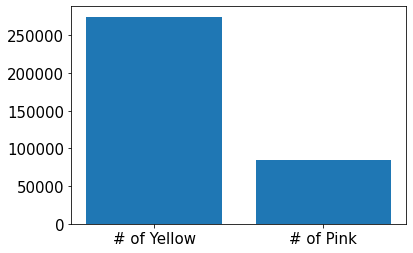

In [675]:
plt.bar([1,2],mainPY['Company'].value_counts())
plt.xticks([1,2],["# of Yellow","# of Pink"])

In [676]:
PinkDF = mainPY[mainPY['Company'] == 'Pink Cab']
YellowDF = mainPY[mainPY['Company'] == 'Yellow Cab']
PinkDF.reset_index()
YellowDF.reset_index()


,index,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
1,2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
2,4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
3,5,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237
4,8,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242
...,...,...,...,...,...,...,...,...,...,...,...,...
274676,440092,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
274677,440093,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
274678,440095,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
274679,440096,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


([<matplotlib.axis.XTick at 0x1c09beb8130>,
 [Text(1, 0, 'Pink'), Text(2, 0, 'Yellow')])

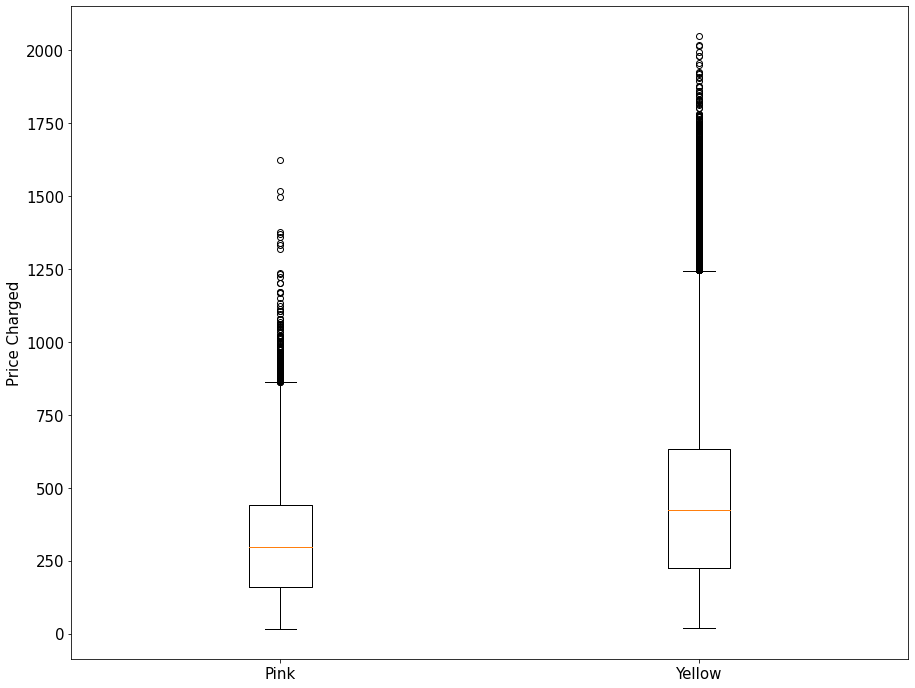

In [677]:
plt.figure(figsize=(15,12))
plt.boxplot([PinkDF['Price Charged'],YellowDF['Price Charged']])
plt.ylabel("Price Charged")
plt.xticks([1,2],["Pink","Yellow"])


C:\Users\antho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


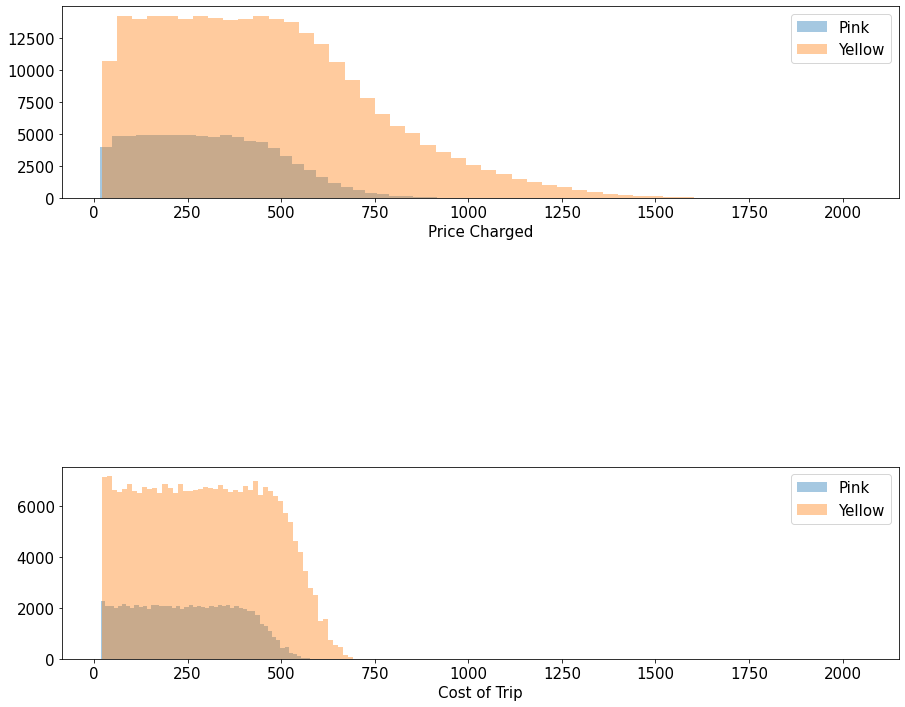

In [678]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(3,1,1)
sns.distplot(PinkDF['Price Charged'],kde=False,label="Pink")
sns.distplot(YellowDF['Price Charged'],kde=False,label="Yellow")
plt.legend()

ax2 = plt.subplot(3,1,3, sharex = ax1)
sns.distplot(PinkDF['Cost of Trip'],kde=False,label="Pink")
sns.distplot(YellowDF['Cost of Trip'],kde=False,label="Yellow")
plt.legend()

#We can see that this plot suggests that Yellow has more variable prices than pink, cost of trip for both are compact

Text(0, 0.5, 'Cost of Trip')

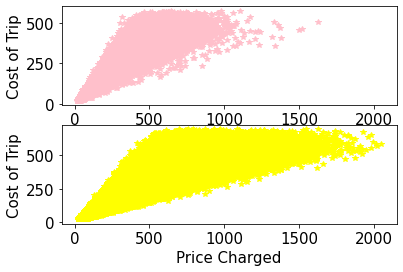

In [679]:
plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(PinkDF["Price Charged"],PinkDF["Cost of Trip"],'*',color='pink')
plt.xlabel("Price Charged")
plt.ylabel("Cost of Trip")
ax2 = plt.subplot(2,1,2, sharex = ax1)
plt.plot(YellowDF["Price Charged"],YellowDF["Cost of Trip"],'*',color='yellow')
plt.xlabel("Price Charged")
plt.ylabel("Cost of Trip")

In [680]:
#------------HYPOTHESIS----------------------------
#1. Which gender provides the most profit per company/////
    #- I believe that holistically, a majority of genders will prefer yellow cab versus pink cab. There will be more males and females that prefer yellow cab versus pink cab.

#2. Which company has more loyal customers? (Customers that have had multiple rides per company? People <= 10 and people <=5
        # I strongly believe that yellow will have more loyal customers than pink.
    
#2. Which income group provides the most profit per company ////
    # Customers with higher income (<10000) use yellow taxi more than pink taxis.
    
#3. Which company has more customer control in the United States? //////
    #- Based on spatial control throughout the United States, yellow cab dominates pink cab.
    
#4. Based on years, is there any seasonality among the influx of profit for each company?/////
    # I beliveve that the influx of profit will be stemmed within the year, rather than yearly margins
    
#5. Has the average profit changed throughout the years for each state? ////
    # It's safe to say that as the years pass, there will be less profit in each state.
    
#6. Forecasting, which company is projected to have more profit? //////
    #I believe that Yellow and pink cab will have less revenue in the years to come. 

In [681]:
#3. Which company has more customer control in the United States?
states = geopandas.read_file('usa-states-census-2014.shp')
states = states.to_crs("EPSG:3395")
states = states.set_index('STUSPS')

<AxesSubplot:>

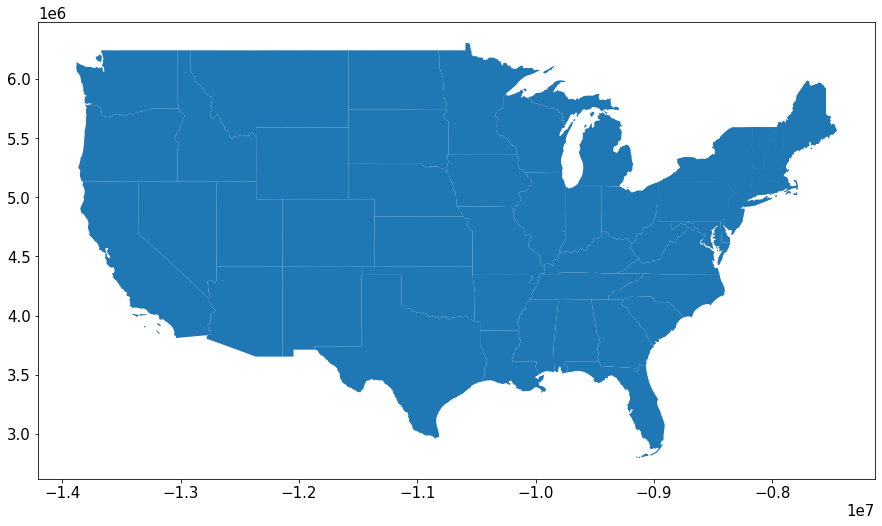

In [682]:
states.plot(figsize=(15,10))

In [683]:
mainPY['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [684]:
PinkDF['City'].value_counts()

LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI FL           2002
AUSTIN TX          1868
NASHVILLE TN       1841
ATLANTA GA         1762
ORANGE COUNTY      1513
DENVER CO          1394
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          864
TUCSON AZ           799
PITTSBURGH PA       682
Name: City, dtype: int64

In [685]:
YellowDF['City'].value_counts()

NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637
SEATTLE WA         5265
SILICON VALLEY     4722
MIAMI FL           4452
AUSTIN TX          3028
ORANGE COUNTY      2469
DENVER CO          2431
PHOENIX AZ         1200
NASHVILLE TN       1169
TUCSON AZ          1132
SACRAMENTO CA      1033
PITTSBURGH PA       631
Name: City, dtype: int64

In [686]:
statesForPink = states.loc[['CA','NY','IL','DC','MA','WA','FL','TX','TN','GA','CO','TX','AZ','PA'],:]

In [687]:
statesForYellow = states.loc[['CA','NY','IL','DC','MA','WA','FL','TX','TN','GA','CO','TX','AZ','PA'],:]

In [688]:
statesForPink.drop_duplicates()
statesForYellow.drop_duplicates()

,STATEFP,STATENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,region,geometry
STUSPS,,,,,,,,,,
CA,06,01779778,0400000US06,06,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
NY,36,01779796,0400000US36,36,New York,00,122054577774,19242052501,Northeast,MULTIPOLYGON Z (((-8017110.170 5024664.442 0.0...
IL,17,01779784,0400000US17,17,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-10186420.016 4867556.657 0.000, -..."
DC,11,01702382,0400000US11,11,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8..."
MA,25,00606926,0400000US25,25,Massachusetts,00,20203936287,7131805598,Northeast,MULTIPOLYGON Z (((-7823035.770 5030029.599 0.0...
WA,53,01779804,0400000US53,53,Washington,00,172120795268,12540315747,West,MULTIPOLYGON Z (((-13718696.562 6189212.318 0....
FL,12,00294478,0400000US12,12,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...
TX,48,01779801,0400000US48,48,Texas,00,676601887070,19059877230,Southwest,"POLYGON Z ((-11869267.604 3729445.479 0.000, -..."
TN,47,01325873,0400000US47,47,Tennessee,00,106800130794,2352882756,Southeast,"POLYGON Z ((-10052227.608 4143268.692 0.000, -..."


In [689]:
valuesYellow = YellowDF['City'].value_counts().to_frame()
valuesPink = PinkDF['City'].value_counts().to_frame()

In [690]:
valuesPink

,City
LOS ANGELES CA,19865
NEW YORK NY,13967
SAN DIEGO CA,10672
CHICAGO IL,9361
BOSTON MA,5186
SILICON VALLEY,3797
WASHINGTON DC,3692
SEATTLE WA,2732
MIAMI FL,2002
AUSTIN TX,1868


In [691]:
valuesYellow = valuesYellow.rename(columns={'City':'Freq'})
valuesYellow = valuesYellow.rename(index={'NEW YORK NY':'NY','CHICAGO IL':'IL','WASHINGTON DC':'DC','LOS ANGELES CA':'CA',
                          'BOSTON MA':'MA','SAN DIEGO CA':'CA','ATLANTA GA':'GA','DALLAS TX':'TX','SEATTLE WA':'WA','SILICON VALLEY'
                          :'CA','MIAMI FL':'FL','AUSTIN TX':'TX','ORANGE COUNTY':'CA','DENVER CO':'CO','PHOENIX AZ':'AZ','NASHVILLE TN':'TN',
                          'TUCSON AZ':'AZ','SACRAMENTO CA':'CA','PITTSBURGH PA':'PA'})
valuesPink = valuesPink.rename(columns={'City':'Freq'})
valuesPink = valuesPink.rename(index={'NEW YORK NY':'NY','CHICAGO IL':'IL','WASHINGTON DC':'DC','LOS ANGELES CA':'CA',
                          'BOSTON MA':'MA','SAN DIEGO CA':'CA','ATLANTA GA':'GA','DALLAS TX':'TX','SEATTLE WA':'WA','SILICON VALLEY'
                          :'CA','MIAMI FL':'FL','AUSTIN TX':'TX','ORANGE COUNTY':'CA','DENVER CO':'CO','PHOENIX AZ':'AZ','NASHVILLE TN':'TN',
                          'TUCSON AZ':'AZ','SACRAMENTO CA':'CA','PITTSBURGH PA':'PA'})


In [692]:
valuesYellow.index.name = 'states'
valuesPink.index.name = 'states'


In [693]:
valuesYellow = (valuesYellow.groupby(['states']).sum())
valuesPink = (valuesPink.groupby(['states']).sum())

In [694]:
fullStateDFYellow = pd.merge(statesForYellow, valuesYellow,left_index=True, right_index=True)
fullStateDFPink = pd.merge(statesForPink, valuesPink,left_index=True, right_index=True)

In [695]:
fullStateDFYellow.drop_duplicates()
fullStateDFPink.drop_duplicates()
max(fullStateDFYellow['Freq'])

85918

(-14205996.319552857, -7131248.786754098, 2620945.878399812, 6483447.286740469)

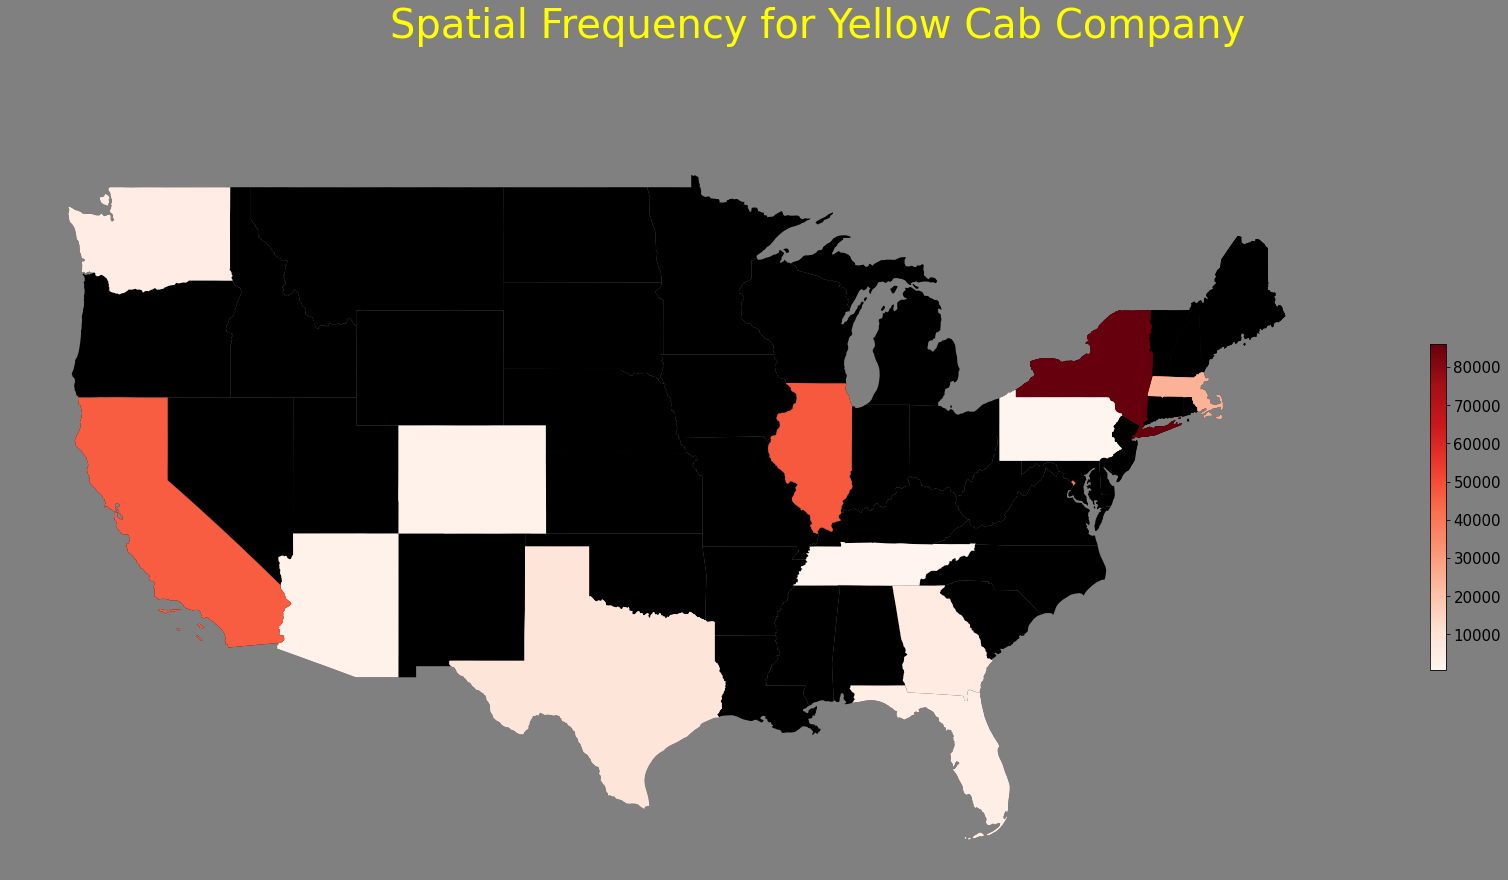

In [696]:
fig,ax = plt.subplots(figsize=(30,20))
states.plot(ax=ax,color = 'black')
fullStateDFYellow.plot(ax=ax,column='Freq',vmin = 600.0,vmax=86000.0,cmap="Reds",figsize=(12,20),legend=True,legend_kwds={'shrink':0.3})
fig.set_facecolor('gray')
fig.suptitle('Spatial Frequency for Yellow Cab Company',y=0.85,fontsize=40,color='yellow')
ax.axis('off')

(-14205996.319552857, -7131248.786754098, 2620945.878399812, 6483447.286740469)

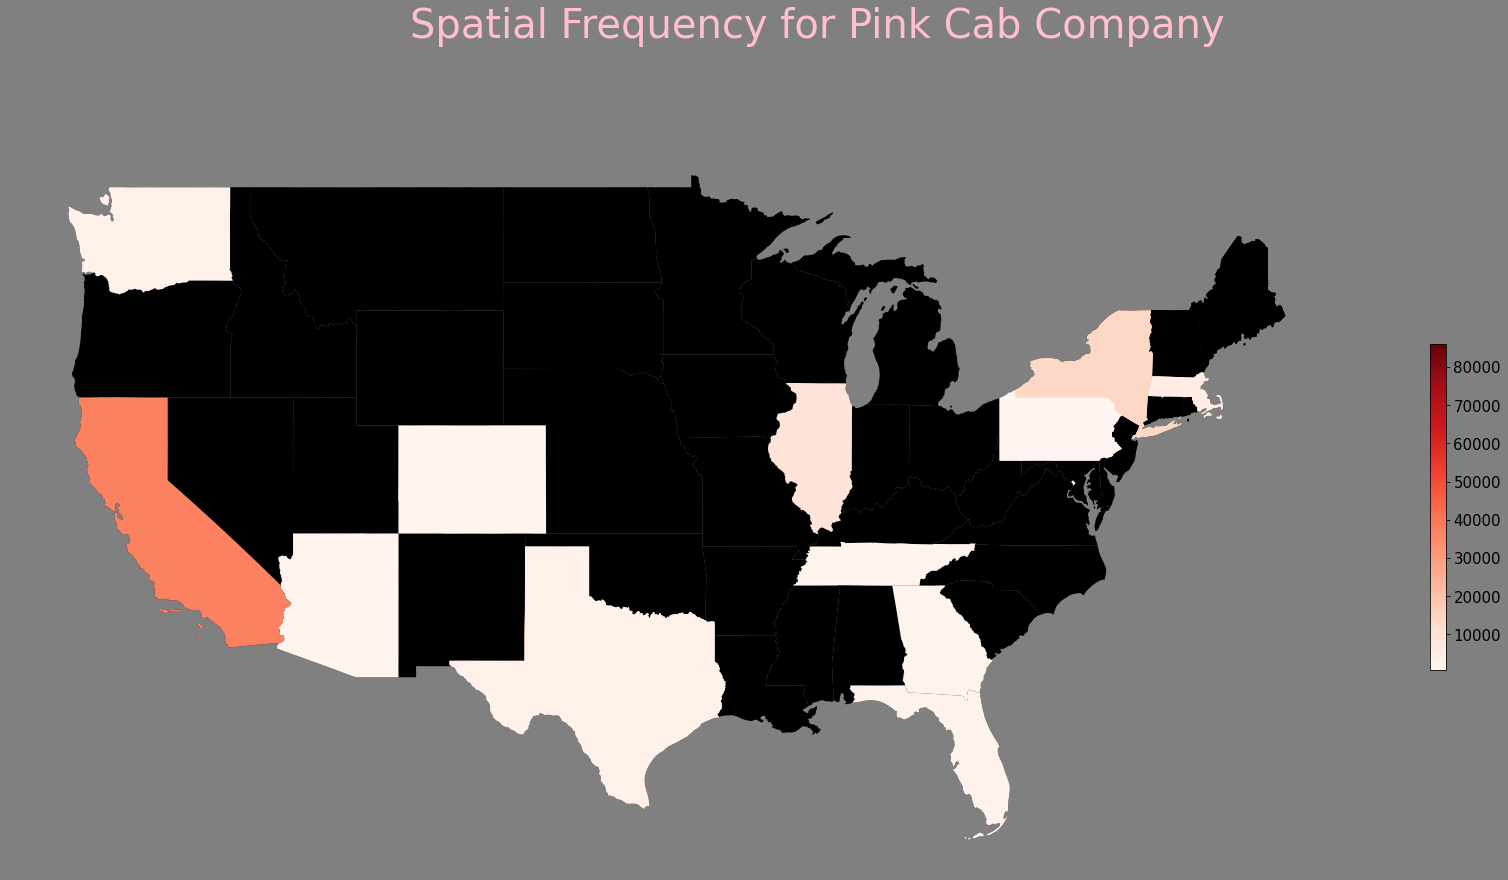

In [697]:
fig,ax = plt.subplots(figsize=(30,20))
states.plot(ax=ax,color = 'black')
fullStateDFPink.plot(ax=ax,column='Freq',vmin = 600.0,vmax=86000.0,cmap="Reds",figsize=(12,12),legend=True,legend_kwds={'shrink':0.3})
fig.set_facecolor('gray')
fig.suptitle('Spatial Frequency for Pink Cab Company',y=0.85,fontsize=40,color='pink')
ax.axis('off')

In [698]:
#We can see that there is a discrepancy between Pink Cab Co and Yellow. 
#Yellow definetly has a larger presence than the pink co.  

In [699]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [700]:
import plotly.express as px

In [701]:
YellowDF['year'] = pd.to_datetime(YellowDF['Date of Travel'], errors='coerce').dt.year
PinkDF['year'] = pd.to_datetime(PinkDF['Date of Travel'], errors='coerce').dt.year

C:\Users\antho\AppData\Local\Temp/ipykernel_32244/3524660851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YellowDF['year'] = pd.to_datetime(YellowDF['Date of Travel'], errors='coerce').dt.year
C:\Users\antho\AppData\Local\Temp/ipykernel_32244/3524660851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PinkDF['year'] = pd.to_datetime(PinkDF['Date of Travel'], errors='coerce').dt.year


In [702]:
YellowDF

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),year
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2018
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2018
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,2018
5,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,2018
8,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
440092,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417,2018
440093,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713,2018
440095,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960,2018
440096,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454,2018


In [703]:
YellowDF['profit'] = YellowDF['Price Charged'] - YellowDF['Cost of Trip']
PinkDF['profit'] = PinkDF['Price Charged'] - PinkDF['Cost of Trip']

C:\Users\antho\AppData\Local\Temp/ipykernel_32244/3047067048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YellowDF['profit'] = YellowDF['Price Charged'] - YellowDF['Cost of Trip']
C:\Users\antho\AppData\Local\Temp/ipykernel_32244/3047067048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PinkDF['profit'] = PinkDF['Price Charged'] - PinkDF['Cost of Trip']


In [704]:
YellowDF

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),year,profit
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2018,281.2772
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2018,194.6480
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,2018,253.9808
5,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,2018,50.8912
8,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,2016,210.0920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440092,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417,2018,47.2656
440093,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713,2018,105.0980
440095,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960,2018,71.2100
440096,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454,2018,21.8600


In [705]:
profitDF = YellowDF[['City','year','profit']]
profitDFPink = PinkDF[['City','year','profit']]

In [706]:
profitDF = profitDF.set_index('City')
profitDFPink = profitDFPink.set_index('City')

In [707]:
profitDF = profitDF.rename(index={'NEW YORK NY':'NY','CHICAGO IL':'IL','WASHINGTON DC':'DC','LOS ANGELES CA':'CA',
                          'BOSTON MA':'MA','SAN DIEGO CA':'CA','ATLANTA GA':'GA','DALLAS TX':'TX','SEATTLE WA':'WA','SILICON VALLEY'
                          :'CA','MIAMI FL':'FL','AUSTIN TX':'TX','ORANGE COUNTY':'CA','DENVER CO':'CO','PHOENIX AZ':'AZ','NASHVILLE TN':'TN',
                          'TUCSON AZ':'AZ','SACRAMENTO CA':'CA','PITTSBURGH PA':'PA'})
profitDFPink = profitDFPink.rename(index={'NEW YORK NY':'NY','CHICAGO IL':'IL','WASHINGTON DC':'DC','LOS ANGELES CA':'CA',
                          'BOSTON MA':'MA','SAN DIEGO CA':'CA','ATLANTA GA':'GA','DALLAS TX':'TX','SEATTLE WA':'WA','SILICON VALLEY'
                          :'CA','MIAMI FL':'FL','AUSTIN TX':'TX','ORANGE COUNTY':'CA','DENVER CO':'CO','PHOENIX AZ':'AZ','NASHVILLE TN':'TN',
                          'TUCSON AZ':'AZ','SACRAMENTO CA':'CA','PITTSBURGH PA':'PA'})

In [708]:
profitDF

,year,profit
City,,
GA,2018,281.2772
GA,2018,194.6480
GA,2018,253.9808
GA,2018,50.8912
GA,2016,210.0920
...,...,...
WA,2018,47.2656
CA,2018,105.0980
AZ,2018,71.2100


In [709]:
profitDF=(profitDF.groupby(['City','year'])).mean()
profitDFPink=(profitDFPink.groupby(['City','year'])).mean()

In [710]:
profitDF = profitDF.unstack()
profitDFPink = profitDFPink.unstack()
profitDFPink
#multiIndex

profit                       
year        2016        2017       2018
City                                   
AZ     65.888665   55.640901  50.992547
CA     66.940685   64.611933  51.620950
CO     35.692592   31.009651  21.745754
DC     52.901758   56.084844  48.437042
FL     84.738850   88.711183  70.053342
GA     66.554637   54.112231  44.515703
IL     40.850585   35.626560  26.636618
MA     61.237649   50.391488  41.421737
NY    112.665691  118.265127  93.904296
PA     26.522565   29.110753  19.688256
TN     37.538577   37.990516  29.527462
TX     53.888087   60.485172  44.595757
WA     49.688716   41.519530  33.560644

Text(0.5, 1.0, 'Profit Average per state (Yellow)')

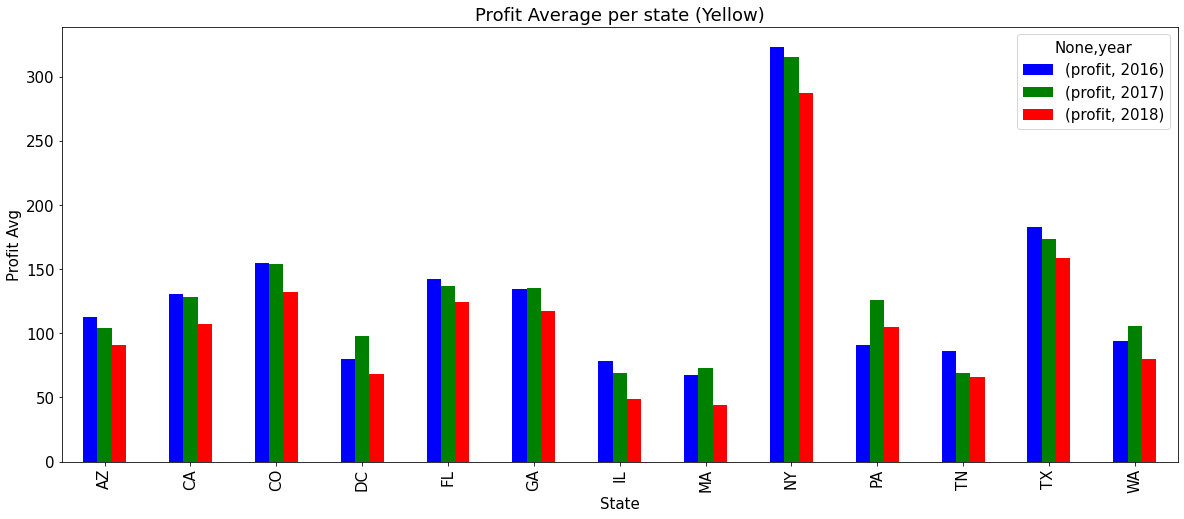

In [711]:
profitDF.plot(kind='bar',figsize=(20,8),color=('blue','green','red'),linewidth=1.5)
plt.xlabel('State')
plt.ylabel('Profit Avg')
plt.xticks(range(0,len(profitDF.index)), profitDF.index)
plt.title('Profit Average per state (Yellow)')

([<matplotlib.axis.YTick at 0x1c09f687460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

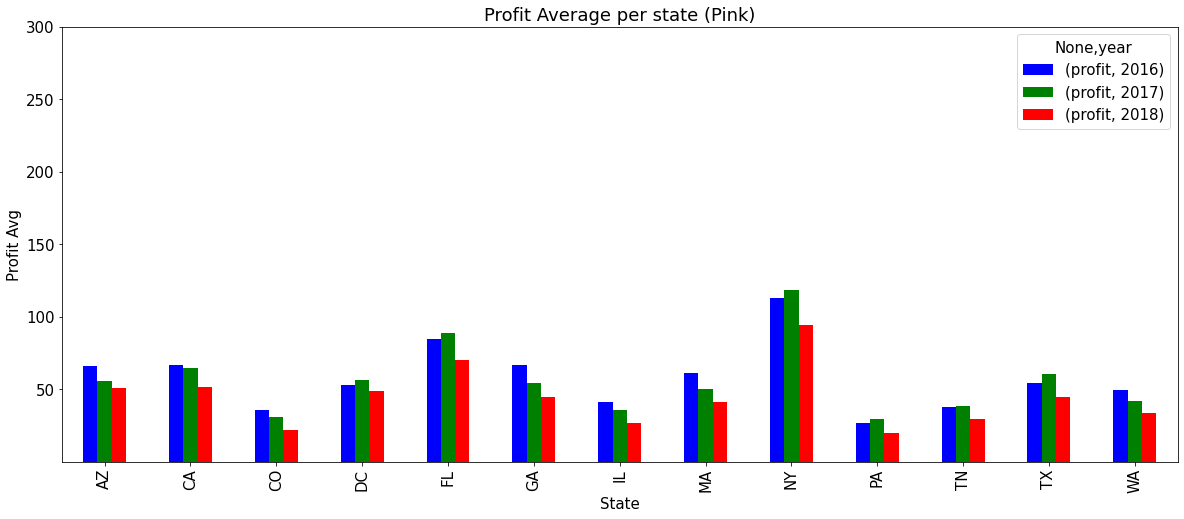

In [712]:
profitDFPink.plot(kind='bar',figsize=(20,8),color=('blue','green','red'),linewidth=1.5)
plt.xlabel('State')
plt.ylabel('Profit Avg')
plt.title('Profit Average per state (Pink)')
plt.xticks(range(0,len(profitDF.index)), profitDF.index)
plt.yticks([50,100,150,200,250,300])


In [713]:
dfRandPink = PinkDF.sample(n=100000,replace=True)
dfRandYellow = YellowDF.sample(n=100000,replace=True)
dfLog = dfRandPink.append(dfRandYellow)
dfLog

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),year,profit
254088,2018-01-02,Pink Cab,NEW YORK NY,30.24,494.02,350.7840,1101,Card,Male,25,11636,2018,143.2360
173763,2017-03-19,Pink Cab,LOS ANGELES CA,24.64,376.79,258.7200,7878,Card,Male,40,11911,2017,118.0700
97313,2018-12-01,Pink Cab,NEW YORK NY,8.08,134.42,83.2240,2845,Card,Female,39,15968,2018,51.1960
297248,2018-07-19,Pink Cab,WASHINGTON DC,9.52,122.50,107.5760,51907,Cash,Male,40,19373,2018,14.9240
77829,2017-05-14,Pink Cab,SAN DIEGO CA,31.03,453.48,332.0210,18030,Card,Male,37,18010,2017,121.4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317399,2017-09-08,Yellow Cab,CHICAGO IL,38.61,509.68,555.9840,5273,Cash,Female,29,4054,2017,-46.3040
126660,2016-12-20,Yellow Cab,CHICAGO IL,26.40,505.71,351.6480,3601,Card,Female,49,7494,2016,154.0620
431122,2018-02-15,Yellow Cab,AUSTIN TX,16.95,293.74,229.8420,34605,Card,Male,38,28169,2018,63.8980
142701,2017-07-21,Yellow Cab,WASHINGTON DC,43.60,755.97,601.6800,53398,Cash,Female,37,6185,2017,154.2900


In [714]:
#What is the age distribution per state? 
LR = LogisticRegression()
LR.fit(dfLog[['profit']], dfLog['Company'])

LogisticRegression()

In [715]:
LR.predict(dfLog[['profit']])

array(['Yellow Cab', 'Yellow Cab', 'Pink Cab', ..., 'Pink Cab',
       'Yellow Cab', 'Pink Cab'], dtype=object)

In [716]:
LR.predict_proba(dfLog[['profit']])

array([[0.42275489, 0.57724511],
       [0.46664676, 0.53335324],
       [0.58395412, 0.41604588],
       ...,
       [0.56199295, 0.43800705],
       [0.40381369, 0.59618631],
       [0.55733976, 0.44266024]])

In [717]:
LR.predict_proba(dfLog[['profit']])[:,1]

array([0.57724511, 0.53335324, 0.41604588, ..., 0.43800705, 0.59618631,
       0.44266024])

In [718]:
predicted_df = pd.DataFrame({'profit':dfLog['profit'],'Label':LR.predict(dfLog[['profit']]),'Probability':LR.predict_proba(dfLog[['profit']])[:,1]})

In [719]:
predicted_df

,profit,Label,Probability
254088,143.2360,Yellow Cab,0.577245
173763,118.0700,Yellow Cab,0.533353
97313,51.1960,Pink Cab,0.416046
297248,14.9240,Pink Cab,0.355401
77829,121.4590,Yellow Cab,0.539310
...,...,...,...
317399,-46.3040,Pink Cab,0.263449
126660,154.0620,Yellow Cab,0.595798
431122,63.8980,Pink Cab,0.438007
142701,154.2900,Yellow Cab,0.596186


In [720]:
dfLog['binary_taxi']=dfLog['profit'].map({'Yellow Cab':0,'Pink Cab':1})

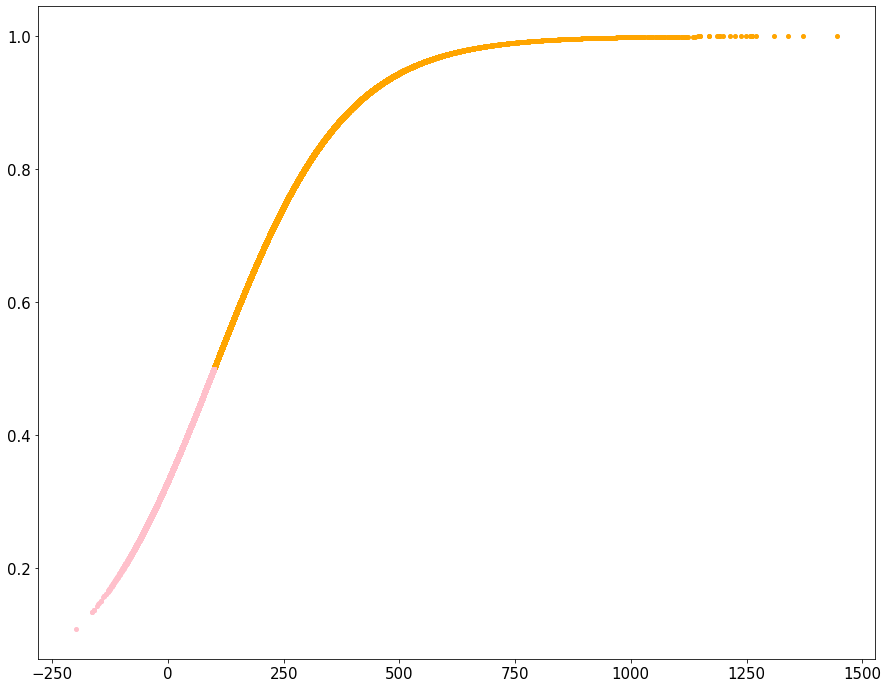

In [721]:
plt.figure(figsize=(15,12))
plt.plot(dfLog['profit'],dfLog['binary_taxi'],'o',markersize=3)
plt.plot(predicted_df[predicted_df['Label']=='Yellow Cab']['profit'],predicted_df[predicted_df['Label']=='Yellow Cab']['Probability'],'o',color='orange',markersize=4)

plt.plot(predicted_df[predicted_df['Label']=='Pink Cab']['profit'],predicted_df[predicted_df['Label']=='Pink Cab']['Probability'],'o',color='pink',markersize=4)


In [722]:
#Yellow cabs have a higher probability in obtaining a higher profit margin compared to pink cabs
#age group analysis
#forecast

In [723]:
timeSeriesPink = PinkDF
timeSeriesYellow = YellowDF
# (profitDF.groupby(['City','year'])).mean()

In [724]:
timeSeriesPink = (timeSeriesPink.groupby(['Date of Travel'])).sum()
timeSeriesYellow = (timeSeriesYellow.groupby(['Date of Travel'])).sum()


In [725]:
timeSeriesPink = timeSeriesPink['profit'].to_frame()
timeSeriesYellow = timeSeriesYellow['profit'].to_frame()

<AxesSubplot:xlabel='Date of Travel'>

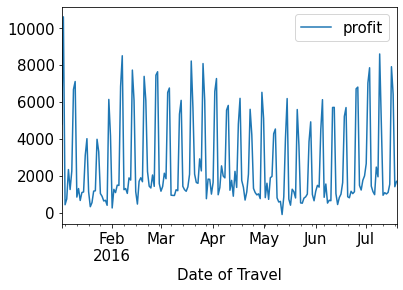

In [726]:
timeSeriesPink[:200].plot()

In [727]:
rollMeanP = timeSeriesPink.rolling(window=12).mean()
rollMeanY = timeSeriesYellow.rolling(window=12).mean()

In [728]:
rollStdP = timeSeriesPink.rolling(window=12).std()
rollStdY = timeSeriesYellow.rolling(window=12).std()

Text(0.5, 1.0, 'Profit average throughout timeline (Pink)')

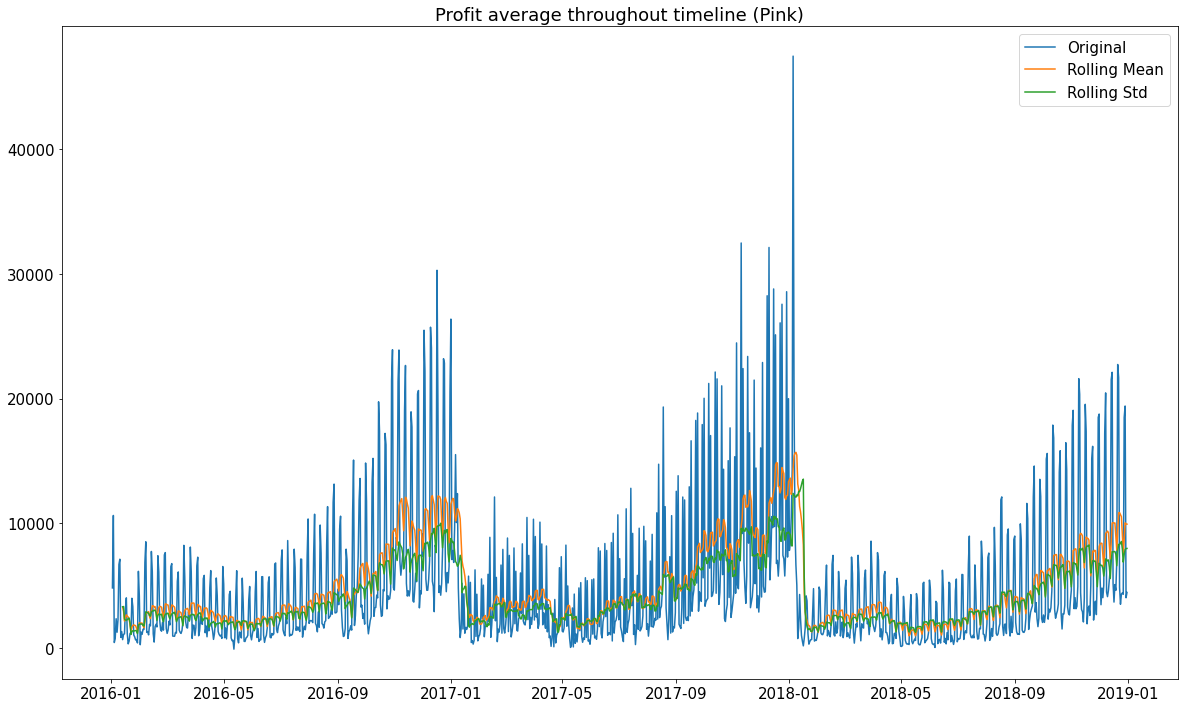

In [729]:
plt.figure(figsize=(20,12))
orig = plt.plot(timeSeriesPink,label='Original')
mean = plt.plot(rollMeanP,label='Rolling Mean')
std = plt.plot(rollStdP,label='Rolling Std')
plt.legend()
plt.title("Profit average throughout timeline (Pink)")

Text(0.5, 1.0, 'Profit average throughout timeline (Yellow)')

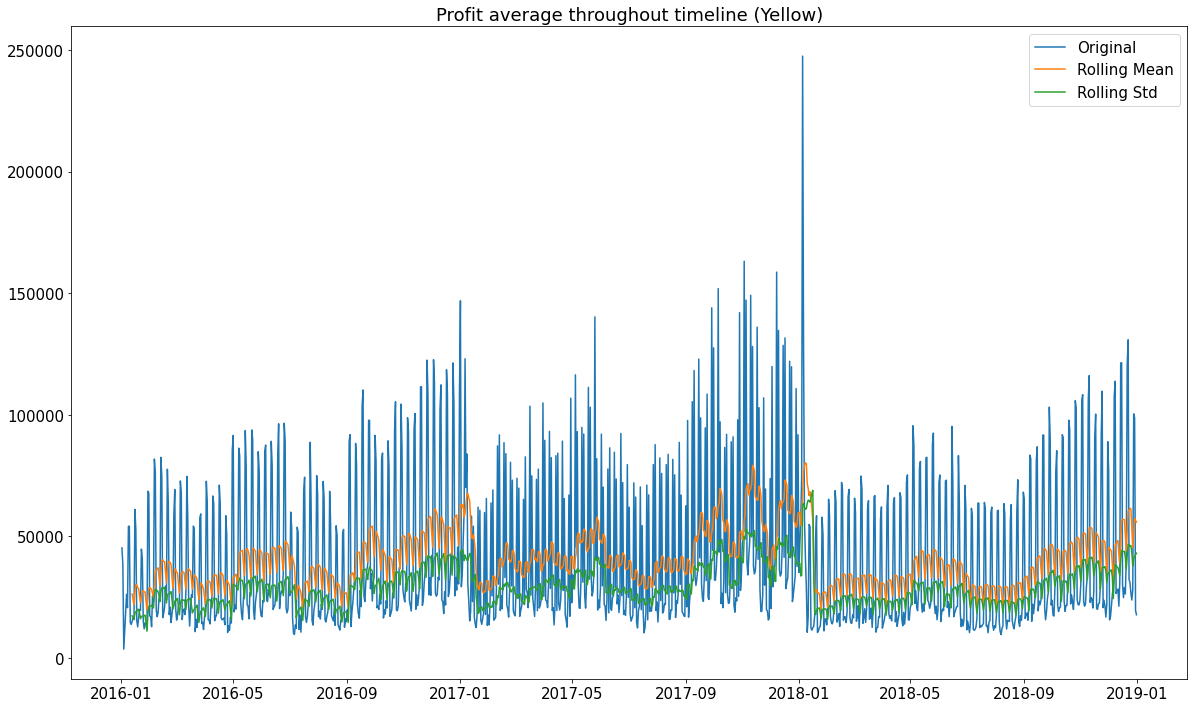

In [730]:
plt.figure(figsize=(20,12))
orig = plt.plot(timeSeriesYellow,label='Original')
mean = plt.plot(rollMeanY,label='Rolling Mean')
std = plt.plot(rollStdY,label='Rolling Std')
plt.legend()
plt.title("Profit average throughout timeline (Yellow)")

In [731]:
#Both taxi companies have seasons of increase towards the beginning of the year, 
#however, we can see that yellow has more variations in the amount of profit they obtain.

#Lets forecast for the next year
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [732]:
dfTestY = adfuller(timeSeriesYellow['profit'],autolag='AIC')
Y = timeSeriesYellow.values
P = timeSeriesPink.values

In [733]:
dfTestY

(-4.091696944968234,
 0.000999588116235721,
 21,
 1073,
 {'1%': -3.436459052172655,
  '5%': -2.864237372528562,
  '10%': -2.568206176974609},
 23069.025944007855)

In [734]:
dfTestP = adfuller(timeSeriesPink['profit'],autolag='AIC')

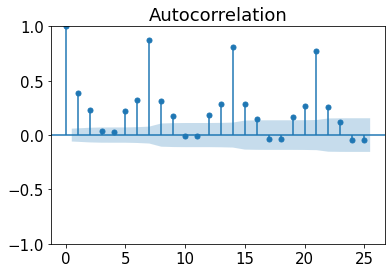

In [735]:
pacfP = plot_acf(timeSeriesPink['profit'],lags = 25)

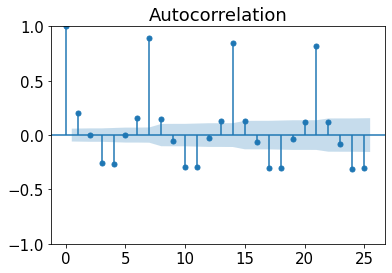

In [736]:
pacfY = plot_acf(timeSeriesYellow['profit'],lags = 25)


In [737]:
trainY=Y[:len(Y)-30]
testY=Y[len(Y)-30:]

trainP=P[:len(P)-30]
testP=P[len(P)-30:]


In [738]:
modelY = AutoReg(trainY,lags=10).fit()
modelP = AutoReg(trainP,lags=10).fit()

In [739]:
print(modelY.summary())
print(modelP.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1065
Model:                    AutoReg(10)   Log Likelihood              -11423.544
Method:               Conditional MLE   S.D. of innovations          12198.463
Date:                Tue, 12 Jul 2022   AIC                          22871.088
Time:                        19:13:50   BIC                          22930.623
Sample:                            10   HQIC                         22893.657
                                 1065                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8800.4792   1428.152      6.162      0.000    6001.353    1.16e+04
y.L1           0.4022      0.031     13.155      0.000       0.342       0.462
y.L2           0.0214      0.033      0.649      0.5

In [740]:
predY = modelY.predict(start=len(trainY),end=len(Y)-1,dynamic=False)
predP = modelP.predict(start=len(trainP),end=len(P)-1,dynamic=False)

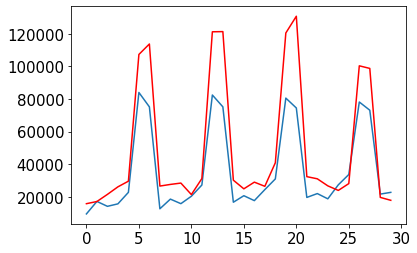

In [741]:
plt.plot(predY)
plt.plot(test,color='Red')

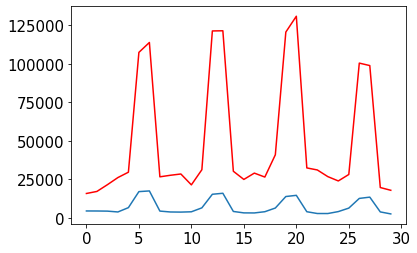

In [742]:
plt.plot(predP)
plt.plot(test,color='Red')

In [743]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmseY = sqrt(mean_squared_error(testY,predY))
rmseP = sqrt(mean_squared_error(testP,predP))

In [744]:
rmseP

3274.118878170256

Text(0.5, 1.0, 'Profit Forecast for the next month of 2019 (Yellow)')

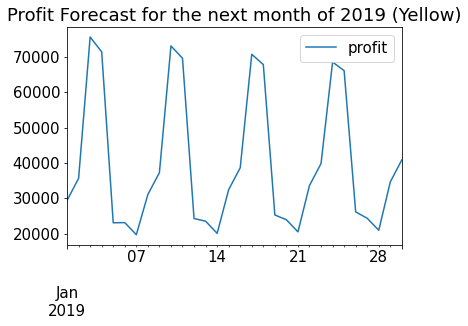

In [745]:
pred_futureY=modelY.predict(start=len(Y)+1, end=len(Y)+30)
pred_futureY
dfPred = pd.DataFrame(pred_futureY,columns=['profit'])
#2016-01-02 	
dfPred.index = pd.date_range(start='2019-01-01',periods=30)
dfPred.plot()
plt.title('Profit Forecast for the next month of 2019 (Yellow)')

Text(0.5, 1.0, 'Profit Forecast for the next month of 2019 (Pink)')

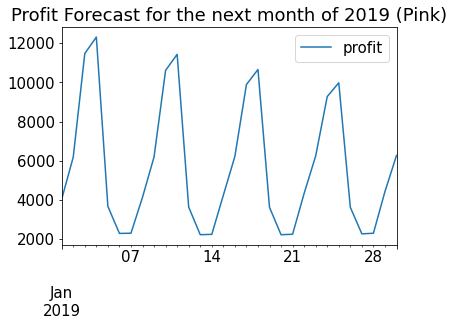

In [746]:
pred_futureP=modelP.predict(start=len(P)+1, end=len(P)+30)
pred_futureP
dfPredP = pd.DataFrame(pred_futureP,columns=['profit'])
#2016-01-02 	
dfPredP.index = pd.date_range(start='2019-01-01',periods=30)
dfPredP.plot()
plt.title('Profit Forecast for the next month of 2019 (Pink)')

In [747]:
#Using an autoregressive model, we can see that both companies seem to fluctuate in profits. This predicted profit may be diminishing over time. 

In [748]:
#Which company has a larger concentration of males versus females per year?
genderY = YellowDF.value_counts('Gender').to_frame()
genderP = PinkDF.value_counts('Gender').to_frame()
genderP.index

Index(['Male', 'Female'], dtype='object', name='Gender')

In [749]:
genderWhole = pd.concat([genderY,genderP],axis=1)
genderWhole=genderWhole.set_axis(['Yellow','Pink'],axis = 1)

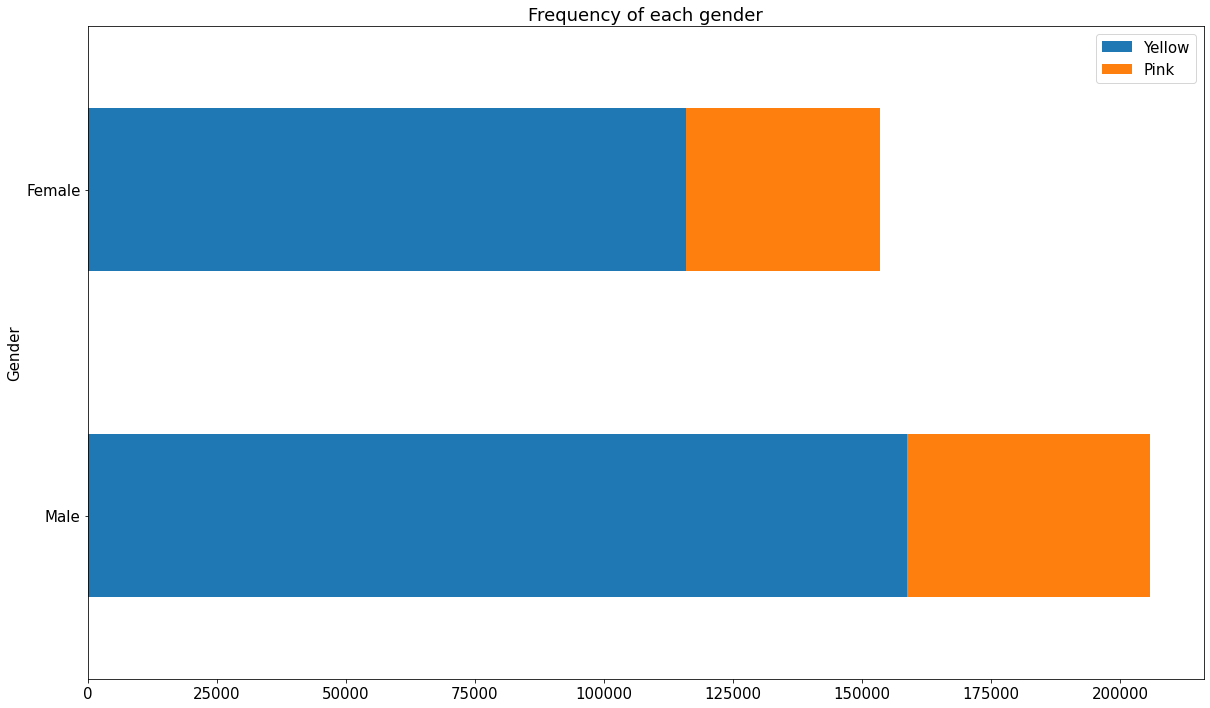

In [750]:
genderWhole.plot(kind='barh',stacked=True,figsize=(20,12),xlabel='Gender',ylabel='Frequency')
plt.title('Frequency of each gender')
plt.rcParams.update({'font.size': 15})
plt.legend(['Yellow','Pink'])

In [751]:
#We see that there are a larger population of males within both companies, the most being yellow overall.

In [752]:
#lets go for a yearly analysis (gender and profit)

In [753]:
genderY = YellowDF[['year','Gender','profit']]
genderP = PinkDF[['year','Gender','profit']]
genderP

,year,Gender,profit
0,2016,Male,57.315
3,2016,Male,23.666
6,2018,Male,25.096
7,2016,Male,27.568
11,2016,Male,25.798
...,...,...,...
440023,2018,Male,91.627
440024,2018,Male,39.108
440026,2018,Male,121.593
440027,2018,Female,80.594


In [754]:
genderY = genderY.groupby(['year','Gender']).mean().unstack(fill_value=0)
genderP = genderP.groupby(['year','Gender']).mean().unstack(fill_value=0)
genderP

profit           
Gender     Female       Male
year                        
2016    67.718353  68.783668
2017    66.562150  67.477735
2018    53.099761  53.335154

([<matplotlib.axis.XTick at 0x1c0addd8df0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

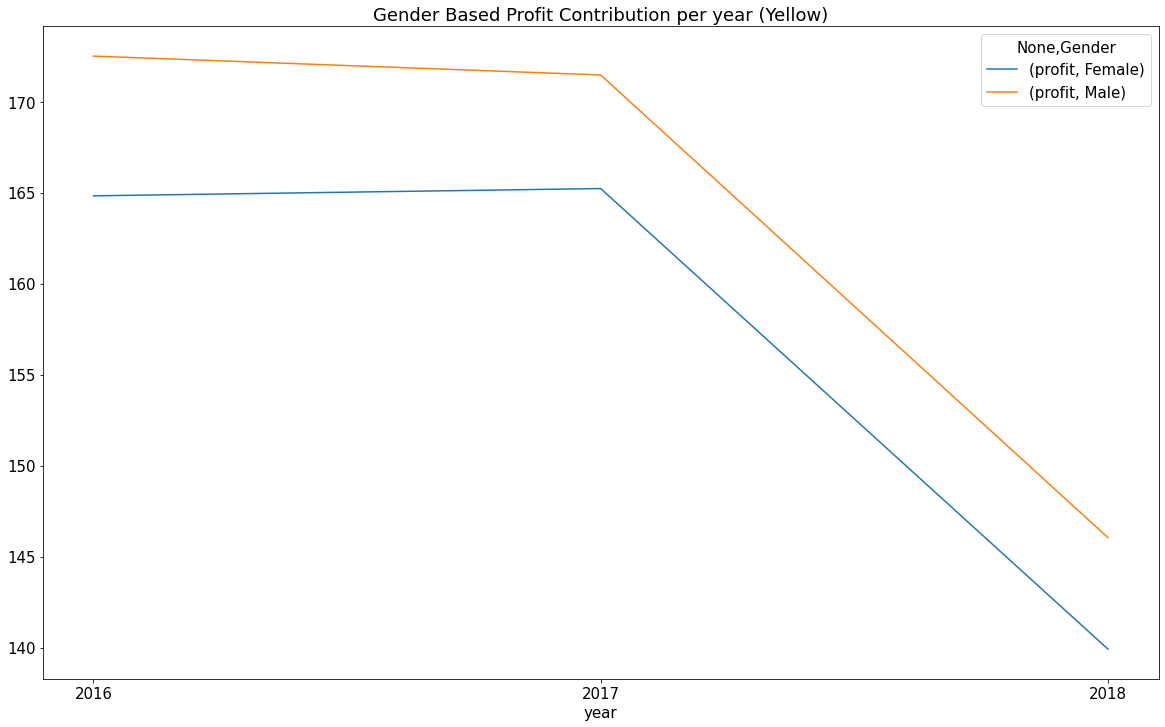

In [755]:
genderY.plot(kind='line',figsize=(20,12))
plt.title('Gender Based Profit Contribution per year (Yellow)')
plt.xticks([2016,2017,2018])

([<matplotlib.axis.XTick at 0x1c0b109fdc0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

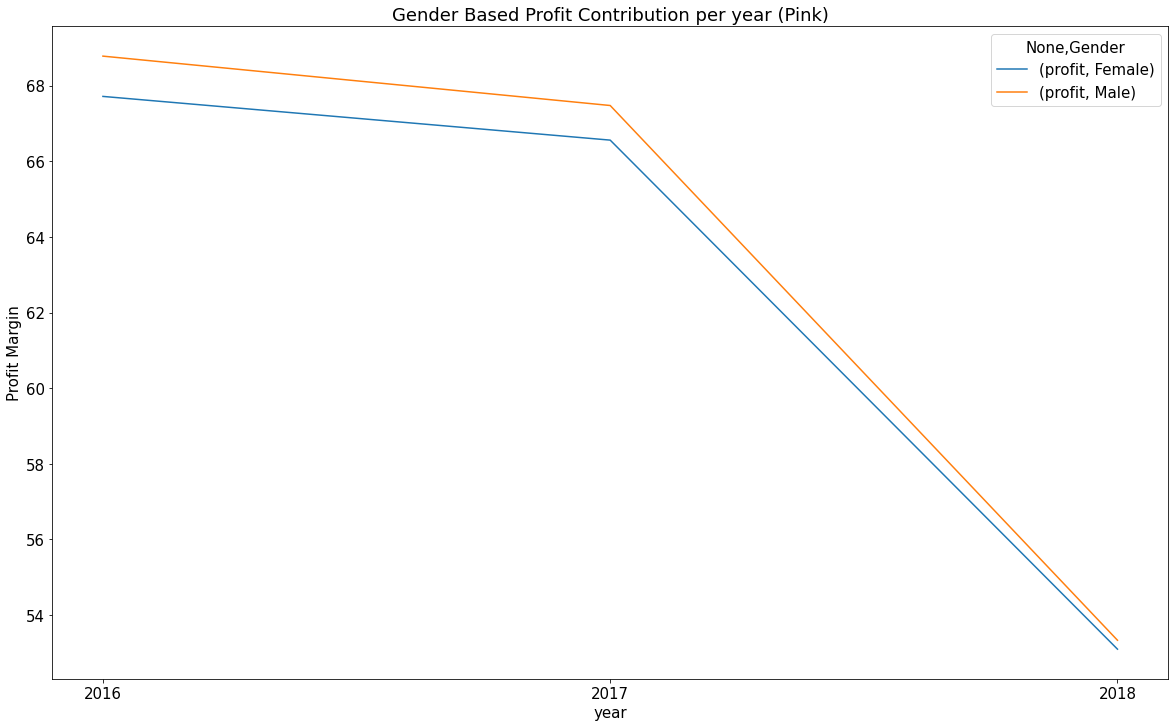

In [756]:
genderP.plot(kind='line',figsize=(20,12))
plt.title('Gender Based Profit Contribution per year (Pink)')
plt.ylabel("Profit Margin")
plt.xticks([2016,2017,2018])

In [757]:
#we can see that the difference is visable within each gender group and how much profit they have contributed per company. 

<AxesSubplot:>

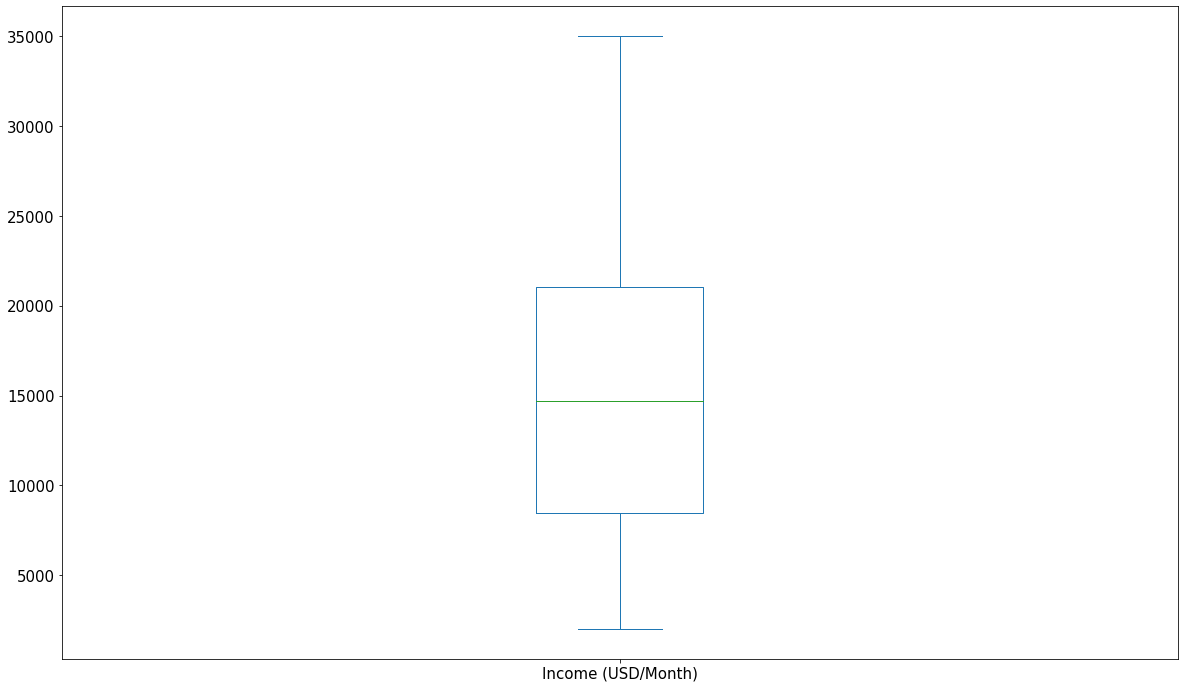

In [758]:
YellowDF['Income (USD/Month)'].plot(kind='box',figsize=(20,12))

In [759]:
PinkDF['Income (USD/Month)'].describe()


count    84711.000000
mean     15059.047137
std       7991.077762
min       2000.000000
25%       8371.000000
50%      14713.000000
75%      21055.000000
max      35000.000000
Name: Income (USD/Month), dtype: float64

In [760]:
YellowDF['Income (USD/Month)'].describe()

count    274681.000000
mean      15045.669817
std        7962.727062
min        2000.000000
25%        8439.000000
50%       14676.000000
75%       21023.000000
max       34996.000000
Name: Income (USD/Month), dtype: float64

In [761]:
IncomePink = PinkDF[['Income (USD/Month)','profit','year']]
IncomeYellow = YellowDF[['Income (USD/Month)','profit','year']]

In [762]:
IncomePink = IncomePink.groupby(['year','Income (USD/Month)']).sum().unstack(fill_value=0)
IncomeYellow = IncomeYellow.groupby(['year','Income (USD/Month)']).sum().unstack(fill_value=0)

In [763]:
IncomePink = IncomePink.transpose()
IncomePink = IncomePink.reset_index()
IncomePink

year,level_0,Income (USD/Month),2016,2017,2018
0,profit,2000,0.000,-5.988,109.900
1,profit,2001,0.000,0.000,145.160
2,profit,2002,0.000,56.272,0.000
3,profit,2003,0.000,95.750,0.000
4,profit,2004,0.000,-8.780,37.789
...,...,...,...,...,...
19180,profit,34985,14.136,0.000,106.500
19181,profit,34989,136.885,333.426,291.775
19182,profit,34995,0.000,0.000,250.520
19183,profit,34996,15.900,0.000,0.000


In [764]:
IncomeYellow = IncomeYellow.transpose()
IncomeYellow = IncomeYellow.reset_index()
IncomeYellow

year,level_0,Income (USD/Month),2016,2017,2018
0,profit,2000,182.0392,278.6660,564.8776
1,profit,2003,764.5300,0.0000,161.9584
2,profit,2004,29.9440,279.9452,47.6040
3,profit,2007,498.6216,403.0920,471.1892
4,profit,2009,0.0000,374.6716,0.0000
...,...,...,...,...,...
21264,profit,34984,33.4868,518.7384,234.6456
21265,profit,34985,287.7924,177.7496,403.4152
21266,profit,34989,2638.4964,3971.7552,1484.8748
21267,profit,34995,16.8912,181.8908,0.0000


In [765]:
#IncomePink.loc[IncomePink['Income (USD/Month)'] < 2500]
dfLowIncomeP = IncomePink.loc[(IncomePink['Income (USD/Month)'] <=2500)]
dfLowIncomeY = IncomeYellow.loc[(IncomeYellow['Income (USD/Month)'] <=2500)]

In [766]:
dfLowIncomeY

year,level_0,Income (USD/Month),2016,2017,2018
0,profit,2000,182.0392,278.6660,564.8776
1,profit,2003,764.5300,0.0000,161.9584
2,profit,2004,29.9440,279.9452,47.6040
3,profit,2007,498.6216,403.0920,471.1892
4,profit,2009,0.0000,374.6716,0.0000
...,...,...,...,...,...
397,profit,2493,4578.0056,5229.5116,4034.0288
398,profit,2495,178.9376,411.8180,59.0936
399,profit,2498,201.0732,-57.2556,574.6692
400,profit,2499,221.9072,41.8900,93.4260


In [767]:
dfLowIncomeP = dfLowIncomeP.agg('sum').to_frame()
dfLowIncomeY = dfLowIncomeY.agg('sum').to_frame()

In [768]:
dfMiddleClassP = IncomePink.loc[(IncomePink['Income (USD/Month)'] >2500) & (IncomePink['Income (USD/Month)'] <=15000) ]
dfMiddleClassY = IncomeYellow.loc[(IncomeYellow['Income (USD/Month)'] >2500) & (IncomeYellow['Income (USD/Month)'] <=15000) ]
dfMiddleClassY

year,level_0,Income (USD/Month),2016,2017,2018
402,profit,2501,1002.7708,569.1324,782.5540
403,profit,2502,110.2680,0.0000,0.0000
404,profit,2503,1166.5052,629.4096,807.3100
405,profit,2504,474.1396,658.0100,124.1136
406,profit,2506,661.6636,892.6152,226.0784
...,...,...,...,...,...
10290,profit,14995,271.1032,450.0448,144.0020
10291,profit,14996,695.5752,144.7892,227.3712
10292,profit,14997,0.0000,0.0000,85.0320
10293,profit,14998,13.5704,0.0000,85.0580


In [769]:
dfMiddleClassP = dfMiddleClassP.agg('sum').to_frame()
dfMiddleClassY = dfMiddleClassY.agg('sum').to_frame()

In [770]:
dfUpperClassP = IncomePink.loc[(IncomePink['Income (USD/Month)'] >15000)]
dfUpperClassY = IncomeYellow.loc[(IncomeYellow['Income (USD/Month)'] >15000)]

In [771]:
dfUpperClassP = dfUpperClassP.agg('sum').to_frame()
dfUpperClassY = dfUpperClassY.agg('sum').to_frame()

In [ ]:
dfLowIncomeP = dfLowIncomeP.drop(['level_0','Income (USD/Month)']).transpose()
dfMiddleClassP = dfMiddleClassP.drop(['level_0','Income (USD/Month)']).transpose()
dfUpperClassP = dfUpperClassP.drop(['level_0','Income (USD/Month)']).transpose()

dfLowIncomeY = dfLowIncomeY.drop(['level_0','Income (USD/Month)']).transpose()
dfMiddleClassY = dfMiddleClassY.drop(['level_0','Income (USD/Month)']).transpose()
dfUpperClassY = dfUpperClassY.drop(['level_0','Income (USD/Month)']).transpose()

In [ ]:
dfLowIncomeP = dfLowIncomeP.rename(index ={0:"LowIncome"})
dfMiddleClassP = dfMiddleClassP.rename(index ={0:"MidIncome"})
dfUpperClassP = dfUpperClassP.rename(index ={0:"HighIncome"})

dfLowIncomeY = dfLowIncomeY.rename(index ={0:"LowIncome"})
dfMiddleClassY = dfMiddleClassY.rename(index ={0:"MidIncome"})
dfUpperClassY = dfUpperClassY.rename(index ={0:"HighIncome"})

In [ ]:
dfClassP = pd.concat([dfLowIncomeP,dfMiddleClassP,dfUpperClassP])
dfClassY = pd.concat([dfLowIncomeY,dfMiddleClassY,dfUpperClassY])

In [ ]:
dfClassP = dfClassP.transpose()
dfClassY = dfClassY.transpose()

In [ ]:
dfClassP.plot(kind='bar',figsize=(15,12),yticks = np.arange(100000,1000000,100000))
plt.ylabel('Profits')
plt.title('Income class wise profit analysis (Pink)')

In [ ]:
dfClassY.plot(kind='bar', figsize=(15,12),yticks = np.arange(1000000,10000000 ,1000000))
plt.ylabel('Profits in Millions')
plt.title('Income class wise profit analysis (Yellow)')

In [ ]:
#In terms of distinguishing people based on income, profits are distributed mainly through people with high to mid income for both companies. 

In [ ]:
YellowDF
#dfLowIncomeY = IncomeYellow.loc[(IncomeYellow['Income (USD/Month)'] <=2500)]
CustomerFreqY = YellowDF['Customer ID'].value_counts().to_frame()
CustFreqP = PinkDF['Customer ID'].value_counts().to_frame()

In [ ]:
dfCustomersWithFiveRidesY = CustomerFreqY.loc[(CustomerFreqY['Customer ID'] >= 5)]
dfCustomersWithTenRidesY = CustomerFreqY.loc[(CustomerFreqY['Customer ID'] >= 10)]

dfCustomersWithFiveRidesP = CustFreqP.loc[(CustFreqP['Customer ID'] >= 5)]
dfCustomersWithTenRidesP = CustFreqP.loc[(CustFreqP['Customer ID'] >= 10)]

In [ ]:
dfCustomersWithFiveRidesY = dfCustomersWithFiveRidesY.count().to_frame().rename(index={'Customer ID': 'At least 5 Rides (Yellow)'})
dfCustomersWithFiveRidesP = dfCustomersWithFiveRidesP.count().to_frame().rename(index={'Customer ID': '5 Rides (Pink)'})


In [ ]:
dfCustomersWithTenRidesY = dfCustomersWithTenRidesY.count().to_frame().rename(index={'Customer ID': 'At least 10 Rides (Yellow)'})
dfCustomersWithTenRidesP = dfCustomersWithTenRidesP.count().to_frame().rename(index={'Customer ID': 'At least 10 Rides (Pink)'})

In [ ]:
CustRetentionTen = pd.concat([dfCustomersWithTenRidesY,dfCustomersWithTenRidesP])

In [ ]:
CustRetentionFive = pd.concat([dfCustomersWithFiveRidesY,dfCustomersWithFiveRidesP])

<AxesSubplot:>

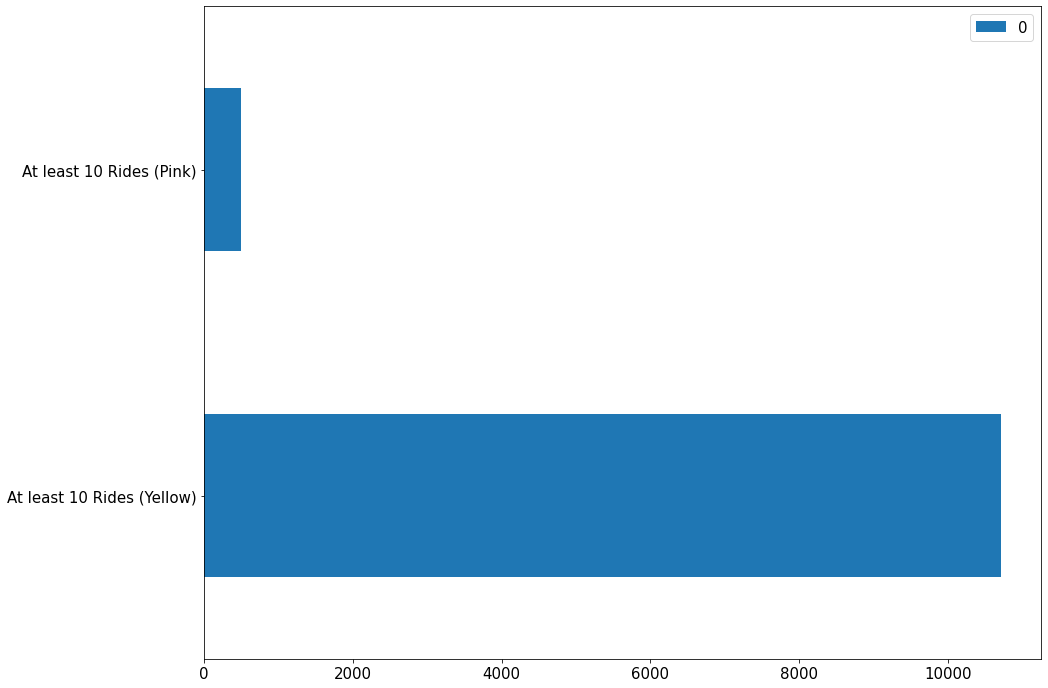

In [773]:
CustRetentionTen.plot(kind='barh',figsize=(15,12))

<AxesSubplot:>

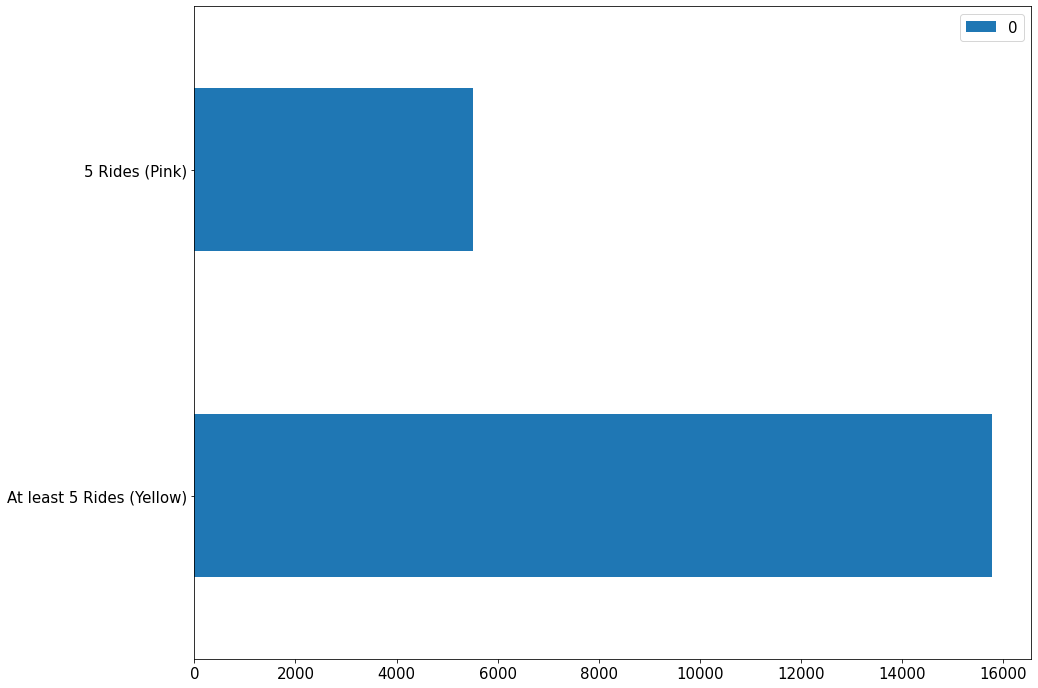

In [774]:
CustRetentionFive.plot(kind='barh',figsize=(15,12))